# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [2]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [3]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [4]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027204961e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [5]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.79412040779e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [6]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 3.865039e-11
W1 max relative error: 3.669858e-09
b1 max relative error: 2.738423e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.0171496079387


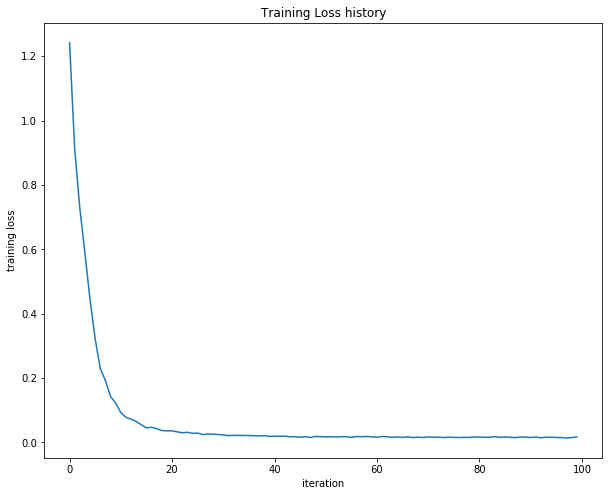

In [7]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [8]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [19]:
input_size = 32 * 32 * 3
hidden_size = 150
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=2000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 2000: loss 2.303744
iteration 100 / 2000: loss 2.302711
iteration 200 / 2000: loss 2.287723
iteration 300 / 2000: loss 2.227011
iteration 400 / 2000: loss 2.203649
iteration 500 / 2000: loss 2.056117
iteration 600 / 2000: loss 2.051768
iteration 700 / 2000: loss 2.085840
iteration 800 / 2000: loss 1.996942
iteration 900 / 2000: loss 1.948331
iteration 1000 / 2000: loss 1.863862
iteration 1100 / 2000: loss 1.888934
iteration 1200 / 2000: loss 1.862427
iteration 1300 / 2000: loss 1.847063
iteration 1400 / 2000: loss 1.911404
iteration 1500 / 2000: loss 1.806781
iteration 1600 / 2000: loss 1.779478
iteration 1700 / 2000: loss 1.819859
iteration 1800 / 2000: loss 1.871237
iteration 1900 / 2000: loss 1.746052
Validation accuracy:  0.366


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

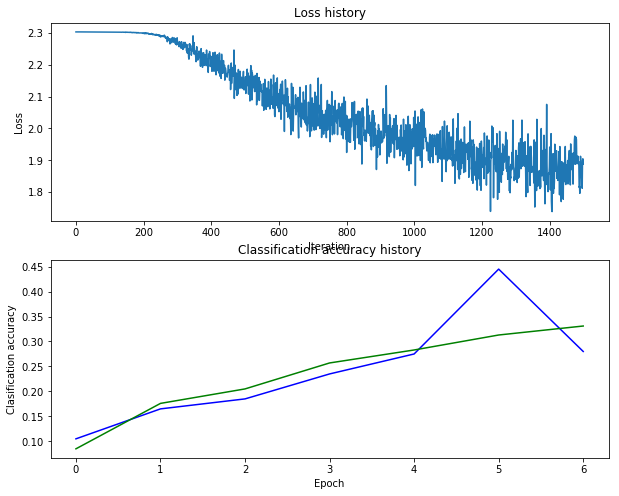

In [18]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], 'b', label='train')
plt.plot(stats['val_acc_history'], 'g', label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

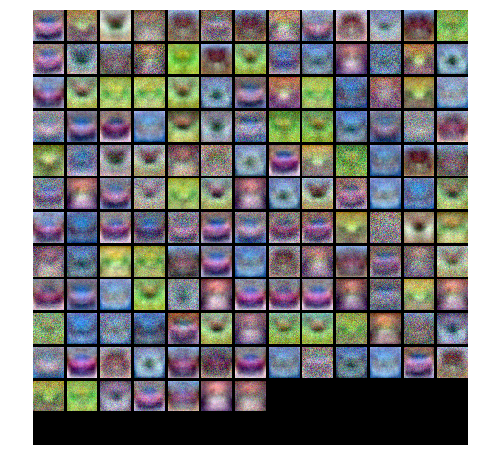

In [20]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [28]:
results = {}
best_net = None # store the best model into this 
best_val = -1
# TODO: random sampling
learning_rates = [1e-6, 5e-6, 1e-5, 1e-4, 2.5e-4, 5e-4, 1e-3, 5e-3, 1e-2]
regularization_strengths = [1e-4, 1e-3, 1e-2, 2.5e-2, 5e-2, 1e-1, 2.5e-1, 5e-1, 1.0, 2.5]
hidden_sizes = [50, 100, 150]

input_size = 32 * 32 * 3
num_classes = 10

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
for hidden_size in hidden_sizes:
    for reg in regularization_strengths:
        for learning_rate in learning_rates:
            net = TwoLayerNet(input_size, hidden_size, num_classes)
            stats = net.train(X_train, y_train, X_val, y_val,
                              num_iters=6500, batch_size=200,
                              learning_rate=learning_rate, learning_rate_decay=0.95,
                              reg=reg, verbose=True)
                    
            y_train_pred = net.predict(X_train)
            y_val_pred = net.predict(X_val)
            train_acc = np.mean(y_train == y_train_pred)
            val_acc = np.mean(y_val == y_val_pred)
         
            results[(hidden_size, learning_rate, reg)] = (train_acc, val_acc)
            if val_acc > best_val:
                best_val = val_acc
                best_net = net

# Print out results.
for hs, lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(hs, lr, reg)]
    print('hs: %d lr %e reg %e train accuracy: %f val accuracy: %f' % (
                hs, lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

iteration 0 / 6500: loss 2.302596
iteration 100 / 6500: loss 2.302589
iteration 200 / 6500: loss 2.302572
iteration 300 / 6500: loss 2.302581
iteration 400 / 6500: loss 2.302565
iteration 500 / 6500: loss 2.302569
iteration 600 / 6500: loss 2.302564
iteration 700 / 6500: loss 2.302574
iteration 800 / 6500: loss 2.302562
iteration 900 / 6500: loss 2.302570
iteration 1000 / 6500: loss 2.302558
iteration 1100 / 6500: loss 2.302552
iteration 1200 / 6500: loss 2.302556
iteration 1300 / 6500: loss 2.302549
iteration 1400 / 6500: loss 2.302557
iteration 1500 / 6500: loss 2.302537
iteration 1600 / 6500: loss 2.302538
iteration 1700 / 6500: loss 2.302548
iteration 1800 / 6500: loss 2.302545
iteration 1900 / 6500: loss 2.302556
iteration 2000 / 6500: loss 2.302520
iteration 2100 / 6500: loss 2.302555
iteration 2200 / 6500: loss 2.302554
iteration 2300 / 6500: loss 2.302542
iteration 2400 / 6500: loss 2.302528
iteration 2500 / 6500: loss 2.302536
iteration 2600 / 6500: loss 2.302532
iteration 270

iteration 2800 / 6500: loss 1.675301
iteration 2900 / 6500: loss 1.700917
iteration 3000 / 6500: loss 1.785150
iteration 3100 / 6500: loss 1.656930
iteration 3200 / 6500: loss 1.795156
iteration 3300 / 6500: loss 1.681945
iteration 3400 / 6500: loss 1.622793
iteration 3500 / 6500: loss 1.593001
iteration 3600 / 6500: loss 1.727406
iteration 3700 / 6500: loss 1.699710
iteration 3800 / 6500: loss 1.644379
iteration 3900 / 6500: loss 1.625688
iteration 4000 / 6500: loss 1.541960
iteration 4100 / 6500: loss 1.724305
iteration 4200 / 6500: loss 1.640361
iteration 4300 / 6500: loss 1.605505
iteration 4400 / 6500: loss 1.636765
iteration 4500 / 6500: loss 1.645799
iteration 4600 / 6500: loss 1.587488
iteration 4700 / 6500: loss 1.595094
iteration 4800 / 6500: loss 1.616109
iteration 4900 / 6500: loss 1.602972
iteration 5000 / 6500: loss 1.592380
iteration 5100 / 6500: loss 1.593357
iteration 5200 / 6500: loss 1.679212
iteration 5300 / 6500: loss 1.702406
iteration 5400 / 6500: loss 1.592500
i

iteration 5600 / 6500: loss 1.139525
iteration 5700 / 6500: loss 1.013607
iteration 5800 / 6500: loss 1.137175
iteration 5900 / 6500: loss 1.149969
iteration 6000 / 6500: loss 1.116513
iteration 6100 / 6500: loss 1.135682
iteration 6200 / 6500: loss 1.138091
iteration 6300 / 6500: loss 0.964823
iteration 6400 / 6500: loss 1.085414
iteration 0 / 6500: loss 2.302618


/home/dd/code/cs231n/assignment1/cs231n/classifiers/neural_net.py:140: RuntimeWarning: overflow encountered in exp
  exp_Z2 = np.exp(Z2)    # NxC
/home/dd/code/cs231n/assignment1/cs231n/classifiers/neural_net.py:141: RuntimeWarning: invalid value encountered in true_divide
  dZ2 = exp_Z2 / exp_Z2.sum(axis=1).reshape(N,1) # NxC
/home/dd/code/cs231n/assignment1/cs231n/classifiers/neural_net.py:159: RuntimeWarning: overflow encountered in exp
  exp_scores = np.exp(scores) # NxC
/home/dd/code/cs231n/assignment1/cs231n/classifiers/neural_net.py:160: RuntimeWarning: invalid value encountered in true_divide
  per_example_losses = -np.log(exp_scores[np.arange(N), y] / np.sum(exp_scores, axis=1))
/home/dd/code/cs231n/assignment1/cs231n/classifiers/neural_net.py:160: RuntimeWarning: divide by zero encountered in log
  per_example_losses = -np.log(exp_scores[np.arange(N), y] / np.sum(exp_scores, axis=1))
/home/dd/code/cs231n/assignment1/cs231n/classifiers/neural_net.py:147: RuntimeWarning: invali

iteration 100 / 6500: loss nan
iteration 200 / 6500: loss nan
iteration 300 / 6500: loss nan
iteration 400 / 6500: loss nan
iteration 500 / 6500: loss nan
iteration 600 / 6500: loss nan
iteration 700 / 6500: loss nan
iteration 800 / 6500: loss nan
iteration 900 / 6500: loss nan
iteration 1000 / 6500: loss nan
iteration 1100 / 6500: loss nan
iteration 1200 / 6500: loss nan
iteration 1300 / 6500: loss nan
iteration 1400 / 6500: loss nan
iteration 1500 / 6500: loss nan
iteration 1600 / 6500: loss nan
iteration 1700 / 6500: loss nan
iteration 1800 / 6500: loss nan
iteration 1900 / 6500: loss nan
iteration 2000 / 6500: loss nan
iteration 2100 / 6500: loss nan
iteration 2200 / 6500: loss nan
iteration 2300 / 6500: loss nan
iteration 2400 / 6500: loss nan
iteration 2500 / 6500: loss nan
iteration 2600 / 6500: loss nan
iteration 2700 / 6500: loss nan
iteration 2800 / 6500: loss nan
iteration 2900 / 6500: loss nan
iteration 3000 / 6500: loss nan
iteration 3100 / 6500: loss nan
iteration 3200 / 

iteration 4600 / 6500: loss 2.300731
iteration 4700 / 6500: loss 2.299947
iteration 4800 / 6500: loss 2.300594
iteration 4900 / 6500: loss 2.300557
iteration 5000 / 6500: loss 2.300144
iteration 5100 / 6500: loss 2.300108
iteration 5200 / 6500: loss 2.299350
iteration 5300 / 6500: loss 2.299836
iteration 5400 / 6500: loss 2.299918
iteration 5500 / 6500: loss 2.300078
iteration 5600 / 6500: loss 2.299059
iteration 5700 / 6500: loss 2.298890
iteration 5800 / 6500: loss 2.299249
iteration 5900 / 6500: loss 2.299469
iteration 6000 / 6500: loss 2.299955
iteration 6100 / 6500: loss 2.298796
iteration 6200 / 6500: loss 2.298951
iteration 6300 / 6500: loss 2.296701
iteration 6400 / 6500: loss 2.297468
iteration 0 / 6500: loss 2.302588
iteration 100 / 6500: loss 2.302544
iteration 200 / 6500: loss 2.302544
iteration 300 / 6500: loss 2.302503
iteration 400 / 6500: loss 2.302490
iteration 500 / 6500: loss 2.302461
iteration 600 / 6500: loss 2.302463
iteration 700 / 6500: loss 2.302365
iteration 8

iteration 900 / 6500: loss 1.656629
iteration 1000 / 6500: loss 1.557067
iteration 1100 / 6500: loss 1.590814
iteration 1200 / 6500: loss 1.642211
iteration 1300 / 6500: loss 1.508584
iteration 1400 / 6500: loss 1.610300
iteration 1500 / 6500: loss 1.535515
iteration 1600 / 6500: loss 1.502624
iteration 1700 / 6500: loss 1.447179
iteration 1800 / 6500: loss 1.302050
iteration 1900 / 6500: loss 1.429383
iteration 2000 / 6500: loss 1.372488
iteration 2100 / 6500: loss 1.543477
iteration 2200 / 6500: loss 1.464296
iteration 2300 / 6500: loss 1.257762
iteration 2400 / 6500: loss 1.303022
iteration 2500 / 6500: loss 1.340089
iteration 2600 / 6500: loss 1.568438
iteration 2700 / 6500: loss 1.311686
iteration 2800 / 6500: loss 1.368356
iteration 2900 / 6500: loss 1.388859
iteration 3000 / 6500: loss 1.514771
iteration 3100 / 6500: loss 1.295719
iteration 3200 / 6500: loss 1.413353
iteration 3300 / 6500: loss 1.502478
iteration 3400 / 6500: loss 1.329844
iteration 3500 / 6500: loss 1.329425
it

iteration 5200 / 6500: loss nan
iteration 5300 / 6500: loss nan
iteration 5400 / 6500: loss nan
iteration 5500 / 6500: loss nan
iteration 5600 / 6500: loss nan
iteration 5700 / 6500: loss nan
iteration 5800 / 6500: loss nan
iteration 5900 / 6500: loss nan
iteration 6000 / 6500: loss nan
iteration 6100 / 6500: loss nan
iteration 6200 / 6500: loss nan
iteration 6300 / 6500: loss nan
iteration 6400 / 6500: loss nan
iteration 0 / 6500: loss 2.302585
iteration 100 / 6500: loss 2.302601
iteration 200 / 6500: loss 2.302579
iteration 300 / 6500: loss 2.302590
iteration 400 / 6500: loss 2.302570
iteration 500 / 6500: loss 2.302571
iteration 600 / 6500: loss 2.302555
iteration 700 / 6500: loss 2.302562
iteration 800 / 6500: loss 2.302548
iteration 900 / 6500: loss 2.302576
iteration 1000 / 6500: loss 2.302573
iteration 1100 / 6500: loss 2.302564
iteration 1200 / 6500: loss 2.302543
iteration 1300 / 6500: loss 2.302549
iteration 1400 / 6500: loss 2.302566
iteration 1500 / 6500: loss 2.302546
iter

iteration 1700 / 6500: loss 1.775060
iteration 1800 / 6500: loss 1.813178
iteration 1900 / 6500: loss 1.816872
iteration 2000 / 6500: loss 1.736696
iteration 2100 / 6500: loss 1.791914
iteration 2200 / 6500: loss 1.681521
iteration 2300 / 6500: loss 1.677440
iteration 2400 / 6500: loss 1.769367
iteration 2500 / 6500: loss 1.758304
iteration 2600 / 6500: loss 1.729892
iteration 2700 / 6500: loss 1.662250
iteration 2800 / 6500: loss 1.691018
iteration 2900 / 6500: loss 1.654815
iteration 3000 / 6500: loss 1.682331
iteration 3100 / 6500: loss 1.733660
iteration 3200 / 6500: loss 1.638463
iteration 3300 / 6500: loss 1.683553
iteration 3400 / 6500: loss 1.629664
iteration 3500 / 6500: loss 1.631101
iteration 3600 / 6500: loss 1.801133
iteration 3700 / 6500: loss 1.723841
iteration 3800 / 6500: loss 1.633243
iteration 3900 / 6500: loss 1.679167
iteration 4000 / 6500: loss 1.572425
iteration 4100 / 6500: loss 1.780985
iteration 4200 / 6500: loss 1.672719
iteration 4300 / 6500: loss 1.719030
i

iteration 4500 / 6500: loss 1.147436
iteration 4600 / 6500: loss 1.090034
iteration 4700 / 6500: loss 1.099275
iteration 4800 / 6500: loss 1.177770
iteration 4900 / 6500: loss 1.000354
iteration 5000 / 6500: loss 1.169983
iteration 5100 / 6500: loss 1.170405
iteration 5200 / 6500: loss 1.225077
iteration 5300 / 6500: loss 1.169088
iteration 5400 / 6500: loss 1.125062
iteration 5500 / 6500: loss 1.205661
iteration 5600 / 6500: loss 1.100696
iteration 5700 / 6500: loss 1.134786
iteration 5800 / 6500: loss 1.206345
iteration 5900 / 6500: loss 1.303802
iteration 6000 / 6500: loss 1.172978
iteration 6100 / 6500: loss 1.176378
iteration 6200 / 6500: loss 1.159118
iteration 6300 / 6500: loss 1.101909
iteration 6400 / 6500: loss 1.146941
iteration 0 / 6500: loss 2.302624
iteration 100 / 6500: loss nan
iteration 200 / 6500: loss nan
iteration 300 / 6500: loss nan
iteration 400 / 6500: loss nan
iteration 500 / 6500: loss nan
iteration 600 / 6500: loss nan
iteration 700 / 6500: loss nan
iteration

iteration 2600 / 6500: loss 2.301767
iteration 2700 / 6500: loss 2.301946
iteration 2800 / 6500: loss 2.301895
iteration 2900 / 6500: loss 2.302215
iteration 3000 / 6500: loss 2.301843
iteration 3100 / 6500: loss 2.301666
iteration 3200 / 6500: loss 2.301645
iteration 3300 / 6500: loss 2.301632
iteration 3400 / 6500: loss 2.301499
iteration 3500 / 6500: loss 2.301707
iteration 3600 / 6500: loss 2.301286
iteration 3700 / 6500: loss 2.301467
iteration 3800 / 6500: loss 2.301296
iteration 3900 / 6500: loss 2.300983
iteration 4000 / 6500: loss 2.300860
iteration 4100 / 6500: loss 2.300995
iteration 4200 / 6500: loss 2.301448
iteration 4300 / 6500: loss 2.300409
iteration 4400 / 6500: loss 2.300746
iteration 4500 / 6500: loss 2.300219
iteration 4600 / 6500: loss 2.300313
iteration 4700 / 6500: loss 2.300786
iteration 4800 / 6500: loss 2.300310
iteration 4900 / 6500: loss 2.299742
iteration 5000 / 6500: loss 2.300588
iteration 5100 / 6500: loss 2.300660
iteration 5200 / 6500: loss 2.299266
i

iteration 5400 / 6500: loss 1.413988
iteration 5500 / 6500: loss 1.443986
iteration 5600 / 6500: loss 1.437881
iteration 5700 / 6500: loss 1.492632
iteration 5800 / 6500: loss 1.424965
iteration 5900 / 6500: loss 1.288072
iteration 6000 / 6500: loss 1.465538
iteration 6100 / 6500: loss 1.501059
iteration 6200 / 6500: loss 1.402885
iteration 6300 / 6500: loss 1.376634
iteration 6400 / 6500: loss 1.433380
iteration 0 / 6500: loss 2.302594
iteration 100 / 6500: loss 2.090792
iteration 200 / 6500: loss 1.958902
iteration 300 / 6500: loss 1.862939
iteration 400 / 6500: loss 1.764274
iteration 500 / 6500: loss 1.642448
iteration 600 / 6500: loss 1.738116
iteration 700 / 6500: loss 1.622224
iteration 800 / 6500: loss 1.643986
iteration 900 / 6500: loss 1.596807
iteration 1000 / 6500: loss 1.436852
iteration 1100 / 6500: loss 1.589863
iteration 1200 / 6500: loss 1.455636
iteration 1300 / 6500: loss 1.543349
iteration 1400 / 6500: loss 1.580227
iteration 1500 / 6500: loss 1.477950
iteration 160

iteration 3000 / 6500: loss nan
iteration 3100 / 6500: loss nan
iteration 3200 / 6500: loss nan
iteration 3300 / 6500: loss nan
iteration 3400 / 6500: loss nan
iteration 3500 / 6500: loss nan
iteration 3600 / 6500: loss nan
iteration 3700 / 6500: loss nan
iteration 3800 / 6500: loss nan
iteration 3900 / 6500: loss nan
iteration 4000 / 6500: loss nan
iteration 4100 / 6500: loss nan
iteration 4200 / 6500: loss nan
iteration 4300 / 6500: loss nan
iteration 4400 / 6500: loss nan
iteration 4500 / 6500: loss nan
iteration 4600 / 6500: loss nan
iteration 4700 / 6500: loss nan
iteration 4800 / 6500: loss nan
iteration 4900 / 6500: loss nan
iteration 5000 / 6500: loss nan
iteration 5100 / 6500: loss nan
iteration 5200 / 6500: loss nan
iteration 5300 / 6500: loss nan
iteration 5400 / 6500: loss nan
iteration 5500 / 6500: loss nan
iteration 5600 / 6500: loss nan
iteration 5700 / 6500: loss nan
iteration 5800 / 6500: loss nan
iteration 5900 / 6500: loss nan
iteration 6000 / 6500: loss nan
iteratio

iteration 6300 / 6500: loss 2.208325
iteration 6400 / 6500: loss 2.220587
iteration 0 / 6500: loss 2.302655
iteration 100 / 6500: loss 2.302267
iteration 200 / 6500: loss 2.293501
iteration 300 / 6500: loss 2.275642
iteration 400 / 6500: loss 2.192228
iteration 500 / 6500: loss 2.122618
iteration 600 / 6500: loss 2.102046
iteration 700 / 6500: loss 2.025399
iteration 800 / 6500: loss 2.029878
iteration 900 / 6500: loss 1.933882
iteration 1000 / 6500: loss 1.852513
iteration 1100 / 6500: loss 1.928785
iteration 1200 / 6500: loss 1.872584
iteration 1300 / 6500: loss 1.883875
iteration 1400 / 6500: loss 1.892200
iteration 1500 / 6500: loss 1.896002
iteration 1600 / 6500: loss 1.767999
iteration 1700 / 6500: loss 1.934310
iteration 1800 / 6500: loss 1.882343
iteration 1900 / 6500: loss 1.868449
iteration 2000 / 6500: loss 1.782049
iteration 2100 / 6500: loss 1.749572
iteration 2200 / 6500: loss 1.806123
iteration 2300 / 6500: loss 1.870084
iteration 2400 / 6500: loss 1.721182
iteration 250

iteration 2600 / 6500: loss 1.298550
iteration 2700 / 6500: loss 1.182662
iteration 2800 / 6500: loss 1.330157
iteration 2900 / 6500: loss 1.546485
iteration 3000 / 6500: loss 1.277557
iteration 3100 / 6500: loss 1.230503
iteration 3200 / 6500: loss 1.126066
iteration 3300 / 6500: loss 1.269282
iteration 3400 / 6500: loss 1.320369
iteration 3500 / 6500: loss 1.332164
iteration 3600 / 6500: loss 1.289762
iteration 3700 / 6500: loss 1.389691
iteration 3800 / 6500: loss 1.289822
iteration 3900 / 6500: loss 1.111100
iteration 4000 / 6500: loss 1.176080
iteration 4100 / 6500: loss 1.091109
iteration 4200 / 6500: loss 1.263321
iteration 4300 / 6500: loss 1.113991
iteration 4400 / 6500: loss 1.174836
iteration 4500 / 6500: loss 1.329235
iteration 4600 / 6500: loss 1.149560
iteration 4700 / 6500: loss 1.374724
iteration 4800 / 6500: loss 1.110388
iteration 4900 / 6500: loss 1.355603
iteration 5000 / 6500: loss 1.339968
iteration 5100 / 6500: loss 1.151660
iteration 5200 / 6500: loss 1.197597
i

iteration 600 / 6500: loss 2.302635
iteration 700 / 6500: loss 2.302620
iteration 800 / 6500: loss 2.302622
iteration 900 / 6500: loss 2.302623
iteration 1000 / 6500: loss 2.302589
iteration 1100 / 6500: loss 2.302570
iteration 1200 / 6500: loss 2.302519
iteration 1300 / 6500: loss 2.302576
iteration 1400 / 6500: loss 2.302582
iteration 1500 / 6500: loss 2.302504
iteration 1600 / 6500: loss 2.302500
iteration 1700 / 6500: loss 2.302531
iteration 1800 / 6500: loss 2.302470
iteration 1900 / 6500: loss 2.302475
iteration 2000 / 6500: loss 2.302425
iteration 2100 / 6500: loss 2.302317
iteration 2200 / 6500: loss 2.302339
iteration 2300 / 6500: loss 2.302256
iteration 2400 / 6500: loss 2.302135
iteration 2500 / 6500: loss 2.302219
iteration 2600 / 6500: loss 2.302277
iteration 2700 / 6500: loss 2.302293
iteration 2800 / 6500: loss 2.302089
iteration 2900 / 6500: loss 2.302086
iteration 3000 / 6500: loss 2.302132
iteration 3100 / 6500: loss 2.301959
iteration 3200 / 6500: loss 2.301892
itera

iteration 3400 / 6500: loss 1.542934
iteration 3500 / 6500: loss 1.421704
iteration 3600 / 6500: loss 1.553963
iteration 3700 / 6500: loss 1.534644
iteration 3800 / 6500: loss 1.420520
iteration 3900 / 6500: loss 1.343415
iteration 4000 / 6500: loss 1.465518
iteration 4100 / 6500: loss 1.511060
iteration 4200 / 6500: loss 1.419556
iteration 4300 / 6500: loss 1.459390
iteration 4400 / 6500: loss 1.330480
iteration 4500 / 6500: loss 1.342514
iteration 4600 / 6500: loss 1.476107
iteration 4700 / 6500: loss 1.409707
iteration 4800 / 6500: loss 1.374583
iteration 4900 / 6500: loss 1.500460
iteration 5000 / 6500: loss 1.508010
iteration 5100 / 6500: loss 1.633506
iteration 5200 / 6500: loss 1.448368
iteration 5300 / 6500: loss 1.435393
iteration 5400 / 6500: loss 1.399578
iteration 5500 / 6500: loss 1.472455
iteration 5600 / 6500: loss 1.534184
iteration 5700 / 6500: loss 1.479452
iteration 5800 / 6500: loss 1.391290
iteration 5900 / 6500: loss 1.416020
iteration 6000 / 6500: loss 1.323546
i

iteration 600 / 6500: loss nan
iteration 700 / 6500: loss nan
iteration 800 / 6500: loss nan
iteration 900 / 6500: loss nan
iteration 1000 / 6500: loss nan
iteration 1100 / 6500: loss nan
iteration 1200 / 6500: loss nan
iteration 1300 / 6500: loss nan
iteration 1400 / 6500: loss nan
iteration 1500 / 6500: loss nan
iteration 1600 / 6500: loss nan
iteration 1700 / 6500: loss nan
iteration 1800 / 6500: loss nan
iteration 1900 / 6500: loss nan
iteration 2000 / 6500: loss nan
iteration 2100 / 6500: loss nan
iteration 2200 / 6500: loss nan
iteration 2300 / 6500: loss nan
iteration 2400 / 6500: loss nan
iteration 2500 / 6500: loss nan
iteration 2600 / 6500: loss nan
iteration 2700 / 6500: loss nan
iteration 2800 / 6500: loss nan
iteration 2900 / 6500: loss nan
iteration 3000 / 6500: loss nan
iteration 3100 / 6500: loss nan
iteration 3200 / 6500: loss nan
iteration 3300 / 6500: loss nan
iteration 3400 / 6500: loss nan
iteration 3500 / 6500: loss nan
iteration 3600 / 6500: loss nan
iteration 37

iteration 4200 / 6500: loss 2.271065
iteration 4300 / 6500: loss 2.276585
iteration 4400 / 6500: loss 2.273722
iteration 4500 / 6500: loss 2.269576
iteration 4600 / 6500: loss 2.264509
iteration 4700 / 6500: loss 2.243324
iteration 4800 / 6500: loss 2.269492
iteration 4900 / 6500: loss 2.265754
iteration 5000 / 6500: loss 2.270225
iteration 5100 / 6500: loss 2.255827
iteration 5200 / 6500: loss 2.243235
iteration 5300 / 6500: loss 2.241264
iteration 5400 / 6500: loss 2.258593
iteration 5500 / 6500: loss 2.242554
iteration 5600 / 6500: loss 2.220948
iteration 5700 / 6500: loss 2.244861
iteration 5800 / 6500: loss 2.199769
iteration 5900 / 6500: loss 2.198512
iteration 6000 / 6500: loss 2.226844
iteration 6100 / 6500: loss 2.244293
iteration 6200 / 6500: loss 2.209268
iteration 6300 / 6500: loss 2.219934
iteration 6400 / 6500: loss 2.240027
iteration 0 / 6500: loss 2.302981
iteration 100 / 6500: loss 2.302590
iteration 200 / 6500: loss 2.297974
iteration 300 / 6500: loss 2.261357
iterati

iteration 500 / 6500: loss 1.738162
iteration 600 / 6500: loss 1.687681
iteration 700 / 6500: loss 1.629904
iteration 800 / 6500: loss 1.632815
iteration 900 / 6500: loss 1.547297
iteration 1000 / 6500: loss 1.415801
iteration 1100 / 6500: loss 1.613758
iteration 1200 / 6500: loss 1.524339
iteration 1300 / 6500: loss 1.527649
iteration 1400 / 6500: loss 1.465121
iteration 1500 / 6500: loss 1.396574
iteration 1600 / 6500: loss 1.444839
iteration 1700 / 6500: loss 1.429426
iteration 1800 / 6500: loss 1.431809
iteration 1900 / 6500: loss 1.426667
iteration 2000 / 6500: loss 1.345975
iteration 2100 / 6500: loss 1.380172
iteration 2200 / 6500: loss 1.355799
iteration 2300 / 6500: loss 1.360573
iteration 2400 / 6500: loss 1.644894
iteration 2500 / 6500: loss 1.493776
iteration 2600 / 6500: loss 1.509137
iteration 2700 / 6500: loss 1.443368
iteration 2800 / 6500: loss 1.423513
iteration 2900 / 6500: loss 1.415545
iteration 3000 / 6500: loss 1.534515
iteration 3100 / 6500: loss 1.473265
iterat

iteration 5000 / 6500: loss 2.303256
iteration 5100 / 6500: loss 2.303254
iteration 5200 / 6500: loss 2.303291
iteration 5300 / 6500: loss 2.303301
iteration 5400 / 6500: loss 2.303271
iteration 5500 / 6500: loss 2.303287
iteration 5600 / 6500: loss 2.303268
iteration 5700 / 6500: loss 2.303241
iteration 5800 / 6500: loss 2.303271
iteration 5900 / 6500: loss 2.303241
iteration 6000 / 6500: loss 2.303253
iteration 6100 / 6500: loss 2.303271
iteration 6200 / 6500: loss 2.303247
iteration 6300 / 6500: loss 2.303304
iteration 6400 / 6500: loss 2.303234
iteration 0 / 6500: loss 2.303345
iteration 100 / 6500: loss 2.303310
iteration 200 / 6500: loss 2.303341
iteration 300 / 6500: loss 2.303330
iteration 400 / 6500: loss 2.303290
iteration 500 / 6500: loss 2.303299
iteration 600 / 6500: loss 2.303282
iteration 700 / 6500: loss 2.303259
iteration 800 / 6500: loss 2.303255
iteration 900 / 6500: loss 2.303237
iteration 1000 / 6500: loss 2.303189
iteration 1100 / 6500: loss 2.303162
iteration 120

iteration 1300 / 6500: loss 1.763241
iteration 1400 / 6500: loss 1.644610
iteration 1500 / 6500: loss 1.651442
iteration 1600 / 6500: loss 1.629585
iteration 1700 / 6500: loss 1.730863
iteration 1800 / 6500: loss 1.657651
iteration 1900 / 6500: loss 1.624095
iteration 2000 / 6500: loss 1.764256
iteration 2100 / 6500: loss 1.582954
iteration 2200 / 6500: loss 1.602146
iteration 2300 / 6500: loss 1.737959
iteration 2400 / 6500: loss 1.686118
iteration 2500 / 6500: loss 1.670632
iteration 2600 / 6500: loss 1.547631
iteration 2700 / 6500: loss 1.602476
iteration 2800 / 6500: loss 1.624649
iteration 2900 / 6500: loss 1.523334
iteration 3000 / 6500: loss 1.570877
iteration 3100 / 6500: loss 1.628616
iteration 3200 / 6500: loss 1.663286
iteration 3300 / 6500: loss 1.663379
iteration 3400 / 6500: loss 1.586167
iteration 3500 / 6500: loss 1.632119
iteration 3600 / 6500: loss 1.572097
iteration 3700 / 6500: loss 1.612794
iteration 3800 / 6500: loss 1.622404
iteration 3900 / 6500: loss 1.563894
i

iteration 4700 / 6500: loss nan
iteration 4800 / 6500: loss nan
iteration 4900 / 6500: loss nan
iteration 5000 / 6500: loss nan
iteration 5100 / 6500: loss nan
iteration 5200 / 6500: loss nan
iteration 5300 / 6500: loss nan
iteration 5400 / 6500: loss nan
iteration 5500 / 6500: loss nan
iteration 5600 / 6500: loss nan
iteration 5700 / 6500: loss nan
iteration 5800 / 6500: loss nan
iteration 5900 / 6500: loss nan
iteration 6000 / 6500: loss nan
iteration 6100 / 6500: loss nan
iteration 6200 / 6500: loss nan
iteration 6300 / 6500: loss nan
iteration 6400 / 6500: loss nan
iteration 0 / 6500: loss 2.303345
iteration 100 / 6500: loss nan
iteration 200 / 6500: loss nan
iteration 300 / 6500: loss nan
iteration 400 / 6500: loss nan
iteration 500 / 6500: loss nan
iteration 600 / 6500: loss nan
iteration 700 / 6500: loss nan
iteration 800 / 6500: loss nan
iteration 900 / 6500: loss nan
iteration 1000 / 6500: loss nan
iteration 1100 / 6500: loss nan
iteration 1200 / 6500: loss nan
iteration 1300 

iteration 2100 / 6500: loss 2.301687
iteration 2200 / 6500: loss 2.302268
iteration 2300 / 6500: loss 2.301591
iteration 2400 / 6500: loss 2.301070
iteration 2500 / 6500: loss 2.300120
iteration 2600 / 6500: loss 2.299464
iteration 2700 / 6500: loss 2.298125
iteration 2800 / 6500: loss 2.297190
iteration 2900 / 6500: loss 2.296477
iteration 3000 / 6500: loss 2.296066
iteration 3100 / 6500: loss 2.295595
iteration 3200 / 6500: loss 2.297812
iteration 3300 / 6500: loss 2.292000
iteration 3400 / 6500: loss 2.293117
iteration 3500 / 6500: loss 2.289751
iteration 3600 / 6500: loss 2.285837
iteration 3700 / 6500: loss 2.290881
iteration 3800 / 6500: loss 2.284486
iteration 3900 / 6500: loss 2.279213
iteration 4000 / 6500: loss 2.281580
iteration 4100 / 6500: loss 2.276141
iteration 4200 / 6500: loss 2.276875
iteration 4300 / 6500: loss 2.280163
iteration 4400 / 6500: loss 2.278584
iteration 4500 / 6500: loss 2.274421
iteration 4600 / 6500: loss 2.265830
iteration 4700 / 6500: loss 2.258938
i

iteration 4900 / 6500: loss 1.763009
iteration 5000 / 6500: loss 1.742603
iteration 5100 / 6500: loss 1.686625
iteration 5200 / 6500: loss 1.597467
iteration 5300 / 6500: loss 1.659495
iteration 5400 / 6500: loss 1.495396
iteration 5500 / 6500: loss 1.497433
iteration 5600 / 6500: loss 1.712815
iteration 5700 / 6500: loss 1.598524
iteration 5800 / 6500: loss 1.636605
iteration 5900 / 6500: loss 1.486393
iteration 6000 / 6500: loss 1.572408
iteration 6100 / 6500: loss 1.578803
iteration 6200 / 6500: loss 1.606772
iteration 6300 / 6500: loss 1.617417
iteration 6400 / 6500: loss 1.717765
iteration 0 / 6500: loss 2.304086
iteration 100 / 6500: loss 1.932311
iteration 200 / 6500: loss 1.806093
iteration 300 / 6500: loss 1.708579
iteration 400 / 6500: loss 1.606768
iteration 500 / 6500: loss 1.750231
iteration 600 / 6500: loss 1.759969
iteration 700 / 6500: loss 1.581639
iteration 800 / 6500: loss 1.677389
iteration 900 / 6500: loss 1.644030
iteration 1000 / 6500: loss 1.728560
iteration 110

iteration 3000 / 6500: loss 2.306273
iteration 3100 / 6500: loss 2.306304
iteration 3200 / 6500: loss 2.306294
iteration 3300 / 6500: loss 2.306280
iteration 3400 / 6500: loss 2.306290
iteration 3500 / 6500: loss 2.306268
iteration 3600 / 6500: loss 2.306275
iteration 3700 / 6500: loss 2.306266
iteration 3800 / 6500: loss 2.306283
iteration 3900 / 6500: loss 2.306236
iteration 4000 / 6500: loss 2.306239
iteration 4100 / 6500: loss 2.306281
iteration 4200 / 6500: loss 2.306289
iteration 4300 / 6500: loss 2.306249
iteration 4400 / 6500: loss 2.306219
iteration 4500 / 6500: loss 2.306243
iteration 4600 / 6500: loss 2.306274
iteration 4700 / 6500: loss 2.306228
iteration 4800 / 6500: loss 2.306258
iteration 4900 / 6500: loss 2.306215
iteration 5000 / 6500: loss 2.306202
iteration 5100 / 6500: loss 2.306220
iteration 5200 / 6500: loss 2.306253
iteration 5300 / 6500: loss 2.306200
iteration 5400 / 6500: loss 2.306217
iteration 5500 / 6500: loss 2.306242
iteration 5600 / 6500: loss 2.306238
i

iteration 5800 / 6500: loss 1.873477
iteration 5900 / 6500: loss 1.757032
iteration 6000 / 6500: loss 1.746680
iteration 6100 / 6500: loss 1.897260
iteration 6200 / 6500: loss 1.835723
iteration 6300 / 6500: loss 1.809080
iteration 6400 / 6500: loss 1.909254
iteration 0 / 6500: loss 2.306409
iteration 100 / 6500: loss 2.293247
iteration 200 / 6500: loss 2.150823
iteration 300 / 6500: loss 2.043767
iteration 400 / 6500: loss 1.979052
iteration 500 / 6500: loss 1.932161
iteration 600 / 6500: loss 1.920252
iteration 700 / 6500: loss 1.943653
iteration 800 / 6500: loss 1.992639
iteration 900 / 6500: loss 1.923034
iteration 1000 / 6500: loss 1.890480
iteration 1100 / 6500: loss 1.905028
iteration 1200 / 6500: loss 1.867801
iteration 1300 / 6500: loss 1.801464
iteration 1400 / 6500: loss 1.794310
iteration 1500 / 6500: loss 1.890215
iteration 1600 / 6500: loss 1.832956
iteration 1700 / 6500: loss 1.828180
iteration 1800 / 6500: loss 1.779662
iteration 1900 / 6500: loss 1.792811
iteration 200

iteration 2400 / 6500: loss nan
iteration 2500 / 6500: loss nan
iteration 2600 / 6500: loss nan
iteration 2700 / 6500: loss nan
iteration 2800 / 6500: loss nan
iteration 2900 / 6500: loss nan
iteration 3000 / 6500: loss nan
iteration 3100 / 6500: loss nan
iteration 3200 / 6500: loss nan
iteration 3300 / 6500: loss nan
iteration 3400 / 6500: loss nan
iteration 3500 / 6500: loss nan
iteration 3600 / 6500: loss nan
iteration 3700 / 6500: loss nan
iteration 3800 / 6500: loss nan
iteration 3900 / 6500: loss nan
iteration 4000 / 6500: loss nan
iteration 4100 / 6500: loss nan
iteration 4200 / 6500: loss nan
iteration 4300 / 6500: loss nan
iteration 4400 / 6500: loss nan
iteration 4500 / 6500: loss nan
iteration 4600 / 6500: loss nan
iteration 4700 / 6500: loss nan
iteration 4800 / 6500: loss nan
iteration 4900 / 6500: loss nan
iteration 5000 / 6500: loss nan
iteration 5100 / 6500: loss nan
iteration 5200 / 6500: loss nan
iteration 5300 / 6500: loss nan
iteration 5400 / 6500: loss nan
iteratio

iteration 100 / 6500: loss 2.302499
iteration 200 / 6500: loss 2.302458
iteration 300 / 6500: loss 2.302397
iteration 400 / 6500: loss 2.302267
iteration 500 / 6500: loss 2.302268
iteration 600 / 6500: loss 2.302241
iteration 700 / 6500: loss 2.302081
iteration 800 / 6500: loss 2.302117
iteration 900 / 6500: loss 2.301563
iteration 1000 / 6500: loss 2.301698
iteration 1100 / 6500: loss 2.301693
iteration 1200 / 6500: loss 2.301161
iteration 1300 / 6500: loss 2.300763
iteration 1400 / 6500: loss 2.300359
iteration 1500 / 6500: loss 2.299771
iteration 1600 / 6500: loss 2.298271
iteration 1700 / 6500: loss 2.298907
iteration 1800 / 6500: loss 2.298278
iteration 1900 / 6500: loss 2.296063
iteration 2000 / 6500: loss 2.296181
iteration 2100 / 6500: loss 2.295438
iteration 2200 / 6500: loss 2.294386
iteration 2300 / 6500: loss 2.294100
iteration 2400 / 6500: loss 2.291314
iteration 2500 / 6500: loss 2.288445
iteration 2600 / 6500: loss 2.287902
iteration 2700 / 6500: loss 2.285309
iteration 

iteration 2900 / 6500: loss 1.500234
iteration 3000 / 6500: loss 1.314527
iteration 3100 / 6500: loss 1.375022
iteration 3200 / 6500: loss 1.182512
iteration 3300 / 6500: loss 1.179094
iteration 3400 / 6500: loss 1.282349
iteration 3500 / 6500: loss 1.276351
iteration 3600 / 6500: loss 1.326465
iteration 3700 / 6500: loss 1.289781
iteration 3800 / 6500: loss 1.321325
iteration 3900 / 6500: loss 1.319792
iteration 4000 / 6500: loss 1.203431
iteration 4100 / 6500: loss 1.231529
iteration 4200 / 6500: loss 1.319756
iteration 4300 / 6500: loss 1.282775
iteration 4400 / 6500: loss 1.194379
iteration 4500 / 6500: loss 1.216572
iteration 4600 / 6500: loss 1.129700
iteration 4700 / 6500: loss 1.186172
iteration 4800 / 6500: loss 1.125658
iteration 4900 / 6500: loss 1.214630
iteration 5000 / 6500: loss 1.112557
iteration 5100 / 6500: loss 1.187691
iteration 5200 / 6500: loss 1.243537
iteration 5300 / 6500: loss 1.232735
iteration 5400 / 6500: loss 1.117060
iteration 5500 / 6500: loss 1.184790
i

iteration 900 / 6500: loss 2.302520
iteration 1000 / 6500: loss 2.302498
iteration 1100 / 6500: loss 2.302541
iteration 1200 / 6500: loss 2.302488
iteration 1300 / 6500: loss 2.302572
iteration 1400 / 6500: loss 2.302518
iteration 1500 / 6500: loss 2.302500
iteration 1600 / 6500: loss 2.302503
iteration 1700 / 6500: loss 2.302472
iteration 1800 / 6500: loss 2.302440
iteration 1900 / 6500: loss 2.302512
iteration 2000 / 6500: loss 2.302540
iteration 2100 / 6500: loss 2.302469
iteration 2200 / 6500: loss 2.302504
iteration 2300 / 6500: loss 2.302511
iteration 2400 / 6500: loss 2.302472
iteration 2500 / 6500: loss 2.302440
iteration 2600 / 6500: loss 2.302415
iteration 2700 / 6500: loss 2.302449
iteration 2800 / 6500: loss 2.302500
iteration 2900 / 6500: loss 2.302468
iteration 3000 / 6500: loss 2.302472
iteration 3100 / 6500: loss 2.302442
iteration 3200 / 6500: loss 2.302410
iteration 3300 / 6500: loss 2.302443
iteration 3400 / 6500: loss 2.302431
iteration 3500 / 6500: loss 2.302389
it

iteration 3700 / 6500: loss 1.639762
iteration 3800 / 6500: loss 1.652334
iteration 3900 / 6500: loss 1.740425
iteration 4000 / 6500: loss 1.566918
iteration 4100 / 6500: loss 1.747917
iteration 4200 / 6500: loss 1.660801
iteration 4300 / 6500: loss 1.678799
iteration 4400 / 6500: loss 1.715033
iteration 4500 / 6500: loss 1.597173
iteration 4600 / 6500: loss 1.726196
iteration 4700 / 6500: loss 1.669500
iteration 4800 / 6500: loss 1.660996
iteration 4900 / 6500: loss 1.592554
iteration 5000 / 6500: loss 1.590816
iteration 5100 / 6500: loss 1.783573
iteration 5200 / 6500: loss 1.637911
iteration 5300 / 6500: loss 1.647680
iteration 5400 / 6500: loss 1.608149
iteration 5500 / 6500: loss 1.676013
iteration 5600 / 6500: loss 1.626437
iteration 5700 / 6500: loss 1.566716
iteration 5800 / 6500: loss 1.600349
iteration 5900 / 6500: loss 1.575972
iteration 6000 / 6500: loss 1.604161
iteration 6100 / 6500: loss 1.628126
iteration 6200 / 6500: loss 1.665764
iteration 6300 / 6500: loss 1.492319
i

iteration 0 / 6500: loss 2.302560
iteration 100 / 6500: loss nan
iteration 200 / 6500: loss nan
iteration 300 / 6500: loss nan
iteration 400 / 6500: loss nan
iteration 500 / 6500: loss nan
iteration 600 / 6500: loss nan
iteration 700 / 6500: loss nan
iteration 800 / 6500: loss nan
iteration 900 / 6500: loss nan
iteration 1000 / 6500: loss nan
iteration 1100 / 6500: loss nan
iteration 1200 / 6500: loss nan
iteration 1300 / 6500: loss nan
iteration 1400 / 6500: loss nan
iteration 1500 / 6500: loss nan
iteration 1600 / 6500: loss nan
iteration 1700 / 6500: loss nan
iteration 1800 / 6500: loss nan
iteration 1900 / 6500: loss nan
iteration 2000 / 6500: loss nan
iteration 2100 / 6500: loss nan
iteration 2200 / 6500: loss nan
iteration 2300 / 6500: loss nan
iteration 2400 / 6500: loss nan
iteration 2500 / 6500: loss nan
iteration 2600 / 6500: loss nan
iteration 2700 / 6500: loss nan
iteration 2800 / 6500: loss nan
iteration 2900 / 6500: loss nan
iteration 3000 / 6500: loss nan
iteration 3100 

iteration 4600 / 6500: loss 2.299546
iteration 4700 / 6500: loss 2.299606
iteration 4800 / 6500: loss 2.299463
iteration 4900 / 6500: loss 2.298615
iteration 5000 / 6500: loss 2.299020
iteration 5100 / 6500: loss 2.297857
iteration 5200 / 6500: loss 2.298647
iteration 5300 / 6500: loss 2.299236
iteration 5400 / 6500: loss 2.296992
iteration 5500 / 6500: loss 2.298321
iteration 5600 / 6500: loss 2.297097
iteration 5700 / 6500: loss 2.297843
iteration 5800 / 6500: loss 2.297202
iteration 5900 / 6500: loss 2.296776
iteration 6000 / 6500: loss 2.297692
iteration 6100 / 6500: loss 2.298361
iteration 6200 / 6500: loss 2.295713
iteration 6300 / 6500: loss 2.296206
iteration 6400 / 6500: loss 2.294272
iteration 0 / 6500: loss 2.302634
iteration 100 / 6500: loss 2.302622
iteration 200 / 6500: loss 2.302508
iteration 300 / 6500: loss 2.302514
iteration 400 / 6500: loss 2.302416
iteration 500 / 6500: loss 2.302448
iteration 600 / 6500: loss 2.302308
iteration 700 / 6500: loss 2.302244
iteration 8

iteration 900 / 6500: loss 1.556623
iteration 1000 / 6500: loss 1.612152
iteration 1100 / 6500: loss 1.521517
iteration 1200 / 6500: loss 1.569401
iteration 1300 / 6500: loss 1.548459
iteration 1400 / 6500: loss 1.447769
iteration 1500 / 6500: loss 1.493318
iteration 1600 / 6500: loss 1.397225
iteration 1700 / 6500: loss 1.285606
iteration 1800 / 6500: loss 1.357540
iteration 1900 / 6500: loss 1.261492
iteration 2000 / 6500: loss 1.410794
iteration 2100 / 6500: loss 1.373737
iteration 2200 / 6500: loss 1.381075
iteration 2300 / 6500: loss 1.247032
iteration 2400 / 6500: loss 1.323161
iteration 2500 / 6500: loss 1.260442
iteration 2600 / 6500: loss 1.305675
iteration 2700 / 6500: loss 1.298874
iteration 2800 / 6500: loss 1.380162
iteration 2900 / 6500: loss 1.320110
iteration 3000 / 6500: loss 1.274834
iteration 3100 / 6500: loss 1.309001
iteration 3200 / 6500: loss 1.296256
iteration 3300 / 6500: loss 1.374228
iteration 3400 / 6500: loss 1.262709
iteration 3500 / 6500: loss 1.237951
it

iteration 5200 / 6500: loss nan
iteration 5300 / 6500: loss nan
iteration 5400 / 6500: loss nan
iteration 5500 / 6500: loss nan
iteration 5600 / 6500: loss nan
iteration 5700 / 6500: loss nan
iteration 5800 / 6500: loss nan
iteration 5900 / 6500: loss nan
iteration 6000 / 6500: loss nan
iteration 6100 / 6500: loss nan
iteration 6200 / 6500: loss nan
iteration 6300 / 6500: loss nan
iteration 6400 / 6500: loss nan
iteration 0 / 6500: loss 2.302650
iteration 100 / 6500: loss 2.302634
iteration 200 / 6500: loss 2.302636
iteration 300 / 6500: loss 2.302640
iteration 400 / 6500: loss 2.302624
iteration 500 / 6500: loss 2.302634
iteration 600 / 6500: loss 2.302615
iteration 700 / 6500: loss 2.302614
iteration 800 / 6500: loss 2.302647
iteration 900 / 6500: loss 2.302603
iteration 1000 / 6500: loss 2.302608
iteration 1100 / 6500: loss 2.302621
iteration 1200 / 6500: loss 2.302624
iteration 1300 / 6500: loss 2.302578
iteration 1400 / 6500: loss 2.302594
iteration 1500 / 6500: loss 2.302590
iter

iteration 1700 / 6500: loss 1.653067
iteration 1800 / 6500: loss 1.762260
iteration 1900 / 6500: loss 1.776910
iteration 2000 / 6500: loss 1.803026
iteration 2100 / 6500: loss 1.826000
iteration 2200 / 6500: loss 1.788279
iteration 2300 / 6500: loss 1.744001
iteration 2400 / 6500: loss 1.681599
iteration 2500 / 6500: loss 1.726114
iteration 2600 / 6500: loss 1.834399
iteration 2700 / 6500: loss 1.718927
iteration 2800 / 6500: loss 1.717368
iteration 2900 / 6500: loss 1.708904
iteration 3000 / 6500: loss 1.610288
iteration 3100 / 6500: loss 1.792823
iteration 3200 / 6500: loss 1.690102
iteration 3300 / 6500: loss 1.681571
iteration 3400 / 6500: loss 1.607993
iteration 3500 / 6500: loss 1.678994
iteration 3600 / 6500: loss 1.634478
iteration 3700 / 6500: loss 1.699303
iteration 3800 / 6500: loss 1.628292
iteration 3900 / 6500: loss 1.622458
iteration 4000 / 6500: loss 1.623621
iteration 4100 / 6500: loss 1.552481
iteration 4200 / 6500: loss 1.670744
iteration 4300 / 6500: loss 1.612442
i

iteration 4500 / 6500: loss 1.169379
iteration 4600 / 6500: loss 1.186577
iteration 4700 / 6500: loss 1.072357
iteration 4800 / 6500: loss 1.112692
iteration 4900 / 6500: loss 1.151107
iteration 5000 / 6500: loss 1.076586
iteration 5100 / 6500: loss 1.032575
iteration 5200 / 6500: loss 0.975995
iteration 5300 / 6500: loss 1.074398
iteration 5400 / 6500: loss 0.938871
iteration 5500 / 6500: loss 1.117152
iteration 5600 / 6500: loss 1.017745
iteration 5700 / 6500: loss 1.058399
iteration 5800 / 6500: loss 0.989262
iteration 5900 / 6500: loss 0.961408
iteration 6000 / 6500: loss 1.089986
iteration 6100 / 6500: loss 0.919686
iteration 6200 / 6500: loss 0.922409
iteration 6300 / 6500: loss 0.992620
iteration 6400 / 6500: loss 1.032682
iteration 0 / 6500: loss 2.302660
iteration 100 / 6500: loss nan
iteration 200 / 6500: loss nan
iteration 300 / 6500: loss nan
iteration 400 / 6500: loss nan
iteration 500 / 6500: loss nan
iteration 600 / 6500: loss nan
iteration 700 / 6500: loss nan
iteration

iteration 2600 / 6500: loss 2.301711
iteration 2700 / 6500: loss 2.301847
iteration 2800 / 6500: loss 2.301666
iteration 2900 / 6500: loss 2.301494
iteration 3000 / 6500: loss 2.301447
iteration 3100 / 6500: loss 2.301711
iteration 3200 / 6500: loss 2.301498
iteration 3300 / 6500: loss 2.300928
iteration 3400 / 6500: loss 2.301548
iteration 3500 / 6500: loss 2.301333
iteration 3600 / 6500: loss 2.301137
iteration 3700 / 6500: loss 2.301099
iteration 3800 / 6500: loss 2.301244
iteration 3900 / 6500: loss 2.300921
iteration 4000 / 6500: loss 2.301234
iteration 4100 / 6500: loss 2.299771
iteration 4200 / 6500: loss 2.300818
iteration 4300 / 6500: loss 2.300866
iteration 4400 / 6500: loss 2.299887
iteration 4500 / 6500: loss 2.300284
iteration 4600 / 6500: loss 2.299571
iteration 4700 / 6500: loss 2.299882
iteration 4800 / 6500: loss 2.299392
iteration 4900 / 6500: loss 2.300063
iteration 5000 / 6500: loss 2.299125
iteration 5100 / 6500: loss 2.299005
iteration 5200 / 6500: loss 2.299710
i

iteration 5400 / 6500: loss 1.313402
iteration 5500 / 6500: loss 1.234739
iteration 5600 / 6500: loss 1.355866
iteration 5700 / 6500: loss 1.352239
iteration 5800 / 6500: loss 1.403926
iteration 5900 / 6500: loss 1.359456
iteration 6000 / 6500: loss 1.301284
iteration 6100 / 6500: loss 1.430797
iteration 6200 / 6500: loss 1.400504
iteration 6300 / 6500: loss 1.405330
iteration 6400 / 6500: loss 1.317446
iteration 0 / 6500: loss 2.302729
iteration 100 / 6500: loss 2.115445
iteration 200 / 6500: loss 1.913922
iteration 300 / 6500: loss 1.778766
iteration 400 / 6500: loss 1.682915
iteration 500 / 6500: loss 1.754580
iteration 600 / 6500: loss 1.616198
iteration 700 / 6500: loss 1.725369
iteration 800 / 6500: loss 1.594418
iteration 900 / 6500: loss 1.522170
iteration 1000 / 6500: loss 1.475815
iteration 1100 / 6500: loss 1.554982
iteration 1200 / 6500: loss 1.617059
iteration 1300 / 6500: loss 1.357071
iteration 1400 / 6500: loss 1.482195
iteration 1500 / 6500: loss 1.467844
iteration 160

iteration 3000 / 6500: loss nan
iteration 3100 / 6500: loss nan
iteration 3200 / 6500: loss nan
iteration 3300 / 6500: loss nan
iteration 3400 / 6500: loss nan
iteration 3500 / 6500: loss nan
iteration 3600 / 6500: loss nan
iteration 3700 / 6500: loss nan
iteration 3800 / 6500: loss nan
iteration 3900 / 6500: loss nan
iteration 4000 / 6500: loss nan
iteration 4100 / 6500: loss nan
iteration 4200 / 6500: loss nan
iteration 4300 / 6500: loss nan
iteration 4400 / 6500: loss nan
iteration 4500 / 6500: loss nan
iteration 4600 / 6500: loss nan
iteration 4700 / 6500: loss nan
iteration 4800 / 6500: loss nan
iteration 4900 / 6500: loss nan
iteration 5000 / 6500: loss nan
iteration 5100 / 6500: loss nan
iteration 5200 / 6500: loss nan
iteration 5300 / 6500: loss nan
iteration 5400 / 6500: loss nan
iteration 5500 / 6500: loss nan
iteration 5600 / 6500: loss nan
iteration 5700 / 6500: loss nan
iteration 5800 / 6500: loss nan
iteration 5900 / 6500: loss nan
iteration 6000 / 6500: loss nan
iteratio

iteration 6300 / 6500: loss 2.180041
iteration 6400 / 6500: loss 2.213230
iteration 0 / 6500: loss 2.302903
iteration 100 / 6500: loss 2.302097
iteration 200 / 6500: loss 2.295592
iteration 300 / 6500: loss 2.241904
iteration 400 / 6500: loss 2.177941
iteration 500 / 6500: loss 2.124016
iteration 600 / 6500: loss 2.096471
iteration 700 / 6500: loss 2.051666
iteration 800 / 6500: loss 1.975524
iteration 900 / 6500: loss 1.953403
iteration 1000 / 6500: loss 1.986258
iteration 1100 / 6500: loss 1.988467
iteration 1200 / 6500: loss 1.836315
iteration 1300 / 6500: loss 1.981059
iteration 1400 / 6500: loss 1.790026
iteration 1500 / 6500: loss 1.789648
iteration 1600 / 6500: loss 1.834500
iteration 1700 / 6500: loss 1.885826
iteration 1800 / 6500: loss 1.876978
iteration 1900 / 6500: loss 1.647096
iteration 2000 / 6500: loss 1.786336
iteration 2100 / 6500: loss 1.762026
iteration 2200 / 6500: loss 1.705730
iteration 2300 / 6500: loss 1.678706
iteration 2400 / 6500: loss 1.763494
iteration 250

iteration 2600 / 6500: loss 1.213435
iteration 2700 / 6500: loss 1.311591
iteration 2800 / 6500: loss 1.212055
iteration 2900 / 6500: loss 1.280313
iteration 3000 / 6500: loss 1.273321
iteration 3100 / 6500: loss 1.176325
iteration 3200 / 6500: loss 1.178603
iteration 3300 / 6500: loss 1.181558
iteration 3400 / 6500: loss 1.302499
iteration 3500 / 6500: loss 1.282757
iteration 3600 / 6500: loss 1.228736
iteration 3700 / 6500: loss 1.324594
iteration 3800 / 6500: loss 1.277358
iteration 3900 / 6500: loss 1.175247
iteration 4000 / 6500: loss 1.122379
iteration 4100 / 6500: loss 1.168685
iteration 4200 / 6500: loss 1.252502
iteration 4300 / 6500: loss 1.277544
iteration 4400 / 6500: loss 1.222812
iteration 4500 / 6500: loss 1.163208
iteration 4600 / 6500: loss 1.243537
iteration 4700 / 6500: loss 1.224456
iteration 4800 / 6500: loss 1.120022
iteration 4900 / 6500: loss 1.103012
iteration 5000 / 6500: loss 1.188358
iteration 5100 / 6500: loss 1.163672
iteration 5200 / 6500: loss 1.152038
i

iteration 600 / 6500: loss 2.303222
iteration 700 / 6500: loss 2.303146
iteration 800 / 6500: loss 2.303210
iteration 900 / 6500: loss 2.303142
iteration 1000 / 6500: loss 2.303084
iteration 1100 / 6500: loss 2.303084
iteration 1200 / 6500: loss 2.303044
iteration 1300 / 6500: loss 2.302988
iteration 1400 / 6500: loss 2.302896
iteration 1500 / 6500: loss 2.303081
iteration 1600 / 6500: loss 2.302924
iteration 1700 / 6500: loss 2.302852
iteration 1800 / 6500: loss 2.302788
iteration 1900 / 6500: loss 2.302608
iteration 2000 / 6500: loss 2.302693
iteration 2100 / 6500: loss 2.302685
iteration 2200 / 6500: loss 2.302804
iteration 2300 / 6500: loss 2.302641
iteration 2400 / 6500: loss 2.302462
iteration 2500 / 6500: loss 2.302302
iteration 2600 / 6500: loss 2.302299
iteration 2700 / 6500: loss 2.302356
iteration 2800 / 6500: loss 2.302335
iteration 2900 / 6500: loss 2.301962
iteration 3000 / 6500: loss 2.302512
iteration 3100 / 6500: loss 2.301992
iteration 3200 / 6500: loss 2.301958
itera

iteration 3400 / 6500: loss 1.598627
iteration 3500 / 6500: loss 1.433845
iteration 3600 / 6500: loss 1.438087
iteration 3700 / 6500: loss 1.437709
iteration 3800 / 6500: loss 1.535035
iteration 3900 / 6500: loss 1.435469
iteration 4000 / 6500: loss 1.551116
iteration 4100 / 6500: loss 1.427160
iteration 4200 / 6500: loss 1.484430
iteration 4300 / 6500: loss 1.514331
iteration 4400 / 6500: loss 1.510721
iteration 4500 / 6500: loss 1.498635
iteration 4600 / 6500: loss 1.473287
iteration 4700 / 6500: loss 1.515314
iteration 4800 / 6500: loss 1.479134
iteration 4900 / 6500: loss 1.412829
iteration 5000 / 6500: loss 1.348814
iteration 5100 / 6500: loss 1.510595
iteration 5200 / 6500: loss 1.523931
iteration 5300 / 6500: loss 1.485660
iteration 5400 / 6500: loss 1.464473
iteration 5500 / 6500: loss 1.440166
iteration 5600 / 6500: loss 1.407688
iteration 5700 / 6500: loss 1.396831
iteration 5800 / 6500: loss 1.524078
iteration 5900 / 6500: loss 1.290167
iteration 6000 / 6500: loss 1.433438
i

iteration 600 / 6500: loss nan
iteration 700 / 6500: loss nan
iteration 800 / 6500: loss nan
iteration 900 / 6500: loss nan
iteration 1000 / 6500: loss nan
iteration 1100 / 6500: loss nan
iteration 1200 / 6500: loss nan
iteration 1300 / 6500: loss nan
iteration 1400 / 6500: loss nan
iteration 1500 / 6500: loss nan
iteration 1600 / 6500: loss nan
iteration 1700 / 6500: loss nan
iteration 1800 / 6500: loss nan
iteration 1900 / 6500: loss nan
iteration 2000 / 6500: loss nan
iteration 2100 / 6500: loss nan
iteration 2200 / 6500: loss nan
iteration 2300 / 6500: loss nan
iteration 2400 / 6500: loss nan
iteration 2500 / 6500: loss nan
iteration 2600 / 6500: loss nan
iteration 2700 / 6500: loss nan
iteration 2800 / 6500: loss nan
iteration 2900 / 6500: loss nan
iteration 3000 / 6500: loss nan
iteration 3100 / 6500: loss nan
iteration 3200 / 6500: loss nan
iteration 3300 / 6500: loss nan
iteration 3400 / 6500: loss nan
iteration 3500 / 6500: loss nan
iteration 3600 / 6500: loss nan
iteration 37

iteration 4200 / 6500: loss 2.256752
iteration 4300 / 6500: loss 2.235384
iteration 4400 / 6500: loss 2.212890
iteration 4500 / 6500: loss 2.241335
iteration 4600 / 6500: loss 2.227142
iteration 4700 / 6500: loss 2.230735
iteration 4800 / 6500: loss 2.223594
iteration 4900 / 6500: loss 2.200136
iteration 5000 / 6500: loss 2.229194
iteration 5100 / 6500: loss 2.235641
iteration 5200 / 6500: loss 2.225990
iteration 5300 / 6500: loss 2.231563
iteration 5400 / 6500: loss 2.224139
iteration 5500 / 6500: loss 2.224119
iteration 5600 / 6500: loss 2.212854
iteration 5700 / 6500: loss 2.228855
iteration 5800 / 6500: loss 2.158052
iteration 5900 / 6500: loss 2.213341
iteration 6000 / 6500: loss 2.177143
iteration 6100 / 6500: loss 2.205092
iteration 6200 / 6500: loss 2.198154
iteration 6300 / 6500: loss 2.182887
iteration 6400 / 6500: loss 2.188674
iteration 0 / 6500: loss 2.304116
iteration 100 / 6500: loss 2.303015
iteration 200 / 6500: loss 2.296557
iteration 300 / 6500: loss 2.245081
iterati

iteration 500 / 6500: loss 1.555706
iteration 600 / 6500: loss 1.569439
iteration 700 / 6500: loss 1.589527
iteration 800 / 6500: loss 1.598746
iteration 900 / 6500: loss 1.675751
iteration 1000 / 6500: loss 1.400235
iteration 1100 / 6500: loss 1.574884
iteration 1200 / 6500: loss 1.554972
iteration 1300 / 6500: loss 1.502009
iteration 1400 / 6500: loss 1.530281
iteration 1500 / 6500: loss 1.423163
iteration 1600 / 6500: loss 1.507528
iteration 1700 / 6500: loss 1.571778
iteration 1800 / 6500: loss 1.611575
iteration 1900 / 6500: loss 1.479508
iteration 2000 / 6500: loss 1.496329
iteration 2100 / 6500: loss 1.451422
iteration 2200 / 6500: loss 1.448591
iteration 2300 / 6500: loss 1.472351
iteration 2400 / 6500: loss 1.575183
iteration 2500 / 6500: loss 1.467330
iteration 2600 / 6500: loss 1.480976
iteration 2700 / 6500: loss 1.591592
iteration 2800 / 6500: loss 1.335359
iteration 2900 / 6500: loss 1.431377
iteration 3000 / 6500: loss 1.518563
iteration 3100 / 6500: loss 1.550306
iterat

iteration 5000 / 6500: loss 2.305461
iteration 5100 / 6500: loss 2.305519
iteration 5200 / 6500: loss 2.305479
iteration 5300 / 6500: loss 2.305429
iteration 5400 / 6500: loss 2.305504
iteration 5500 / 6500: loss 2.305460
iteration 5600 / 6500: loss 2.305521
iteration 5700 / 6500: loss 2.305421
iteration 5800 / 6500: loss 2.305511
iteration 5900 / 6500: loss 2.305437
iteration 6000 / 6500: loss 2.305412
iteration 6100 / 6500: loss 2.305430
iteration 6200 / 6500: loss 2.305427
iteration 6300 / 6500: loss 2.305426
iteration 6400 / 6500: loss 2.305450
iteration 0 / 6500: loss 2.305630
iteration 100 / 6500: loss 2.305617
iteration 200 / 6500: loss 2.305561
iteration 300 / 6500: loss 2.305568
iteration 400 / 6500: loss 2.305555
iteration 500 / 6500: loss 2.305518
iteration 600 / 6500: loss 2.305463
iteration 700 / 6500: loss 2.305430
iteration 800 / 6500: loss 2.305389
iteration 900 / 6500: loss 2.305327
iteration 1000 / 6500: loss 2.305297
iteration 1100 / 6500: loss 2.305238
iteration 120

iteration 1300 / 6500: loss 1.675545
iteration 1400 / 6500: loss 1.696683
iteration 1500 / 6500: loss 1.683853
iteration 1600 / 6500: loss 1.663197
iteration 1700 / 6500: loss 1.721555
iteration 1800 / 6500: loss 1.858915
iteration 1900 / 6500: loss 1.796894
iteration 2000 / 6500: loss 1.654062
iteration 2100 / 6500: loss 1.703794
iteration 2200 / 6500: loss 1.569878
iteration 2300 / 6500: loss 1.663830
iteration 2400 / 6500: loss 1.743071
iteration 2500 / 6500: loss 1.641481
iteration 2600 / 6500: loss 1.759675
iteration 2700 / 6500: loss 1.675656
iteration 2800 / 6500: loss 1.758670
iteration 2900 / 6500: loss 1.793598
iteration 3000 / 6500: loss 1.580468
iteration 3100 / 6500: loss 1.567084
iteration 3200 / 6500: loss 1.601015
iteration 3300 / 6500: loss 1.643482
iteration 3400 / 6500: loss 1.676006
iteration 3500 / 6500: loss 1.756910
iteration 3600 / 6500: loss 1.687744
iteration 3700 / 6500: loss 1.636253
iteration 3800 / 6500: loss 1.593497
iteration 3900 / 6500: loss 1.676566
i

iteration 4700 / 6500: loss nan
iteration 4800 / 6500: loss nan
iteration 4900 / 6500: loss nan
iteration 5000 / 6500: loss nan
iteration 5100 / 6500: loss nan
iteration 5200 / 6500: loss nan
iteration 5300 / 6500: loss nan
iteration 5400 / 6500: loss nan
iteration 5500 / 6500: loss nan
iteration 5600 / 6500: loss nan
iteration 5700 / 6500: loss nan
iteration 5800 / 6500: loss nan
iteration 5900 / 6500: loss nan
iteration 6000 / 6500: loss nan
iteration 6100 / 6500: loss nan
iteration 6200 / 6500: loss nan
iteration 6300 / 6500: loss nan
iteration 6400 / 6500: loss nan
iteration 0 / 6500: loss 2.305669
iteration 100 / 6500: loss nan
iteration 200 / 6500: loss nan
iteration 300 / 6500: loss nan
iteration 400 / 6500: loss nan
iteration 500 / 6500: loss nan
iteration 600 / 6500: loss nan
iteration 700 / 6500: loss nan
iteration 800 / 6500: loss nan
iteration 900 / 6500: loss nan
iteration 1000 / 6500: loss nan
iteration 1100 / 6500: loss nan
iteration 1200 / 6500: loss nan
iteration 1300 

iteration 2100 / 6500: loss 2.305441
iteration 2200 / 6500: loss 2.303343
iteration 2300 / 6500: loss 2.302819
iteration 2400 / 6500: loss 2.302346
iteration 2500 / 6500: loss 2.300793
iteration 2600 / 6500: loss 2.302637
iteration 2700 / 6500: loss 2.297788
iteration 2800 / 6500: loss 2.296545
iteration 2900 / 6500: loss 2.297395
iteration 3000 / 6500: loss 2.297284
iteration 3100 / 6500: loss 2.292809
iteration 3200 / 6500: loss 2.291728
iteration 3300 / 6500: loss 2.291576
iteration 3400 / 6500: loss 2.280453
iteration 3500 / 6500: loss 2.284952
iteration 3600 / 6500: loss 2.283657
iteration 3700 / 6500: loss 2.278555
iteration 3800 / 6500: loss 2.264907
iteration 3900 / 6500: loss 2.267761
iteration 4000 / 6500: loss 2.270016
iteration 4100 / 6500: loss 2.277260
iteration 4200 / 6500: loss 2.267352
iteration 4300 / 6500: loss 2.255319
iteration 4400 / 6500: loss 2.233013
iteration 4500 / 6500: loss 2.249603
iteration 4600 / 6500: loss 2.251114
iteration 4700 / 6500: loss 2.253537
i

iteration 4900 / 6500: loss 1.693097
iteration 5000 / 6500: loss 1.855084
iteration 5100 / 6500: loss 1.802714
iteration 5200 / 6500: loss 1.795521
iteration 5300 / 6500: loss 1.856715
iteration 5400 / 6500: loss 1.764474
iteration 5500 / 6500: loss 1.884272
iteration 5600 / 6500: loss 1.748912
iteration 5700 / 6500: loss 1.705771
iteration 5800 / 6500: loss 1.821454
iteration 5900 / 6500: loss 1.813210
iteration 6000 / 6500: loss 1.776619
iteration 6100 / 6500: loss 1.749042
iteration 6200 / 6500: loss 1.665941
iteration 6300 / 6500: loss 1.804924
iteration 6400 / 6500: loss 1.803290
iteration 0 / 6500: loss 2.310264
iteration 100 / 6500: loss 1.940298
iteration 200 / 6500: loss 1.903992
iteration 300 / 6500: loss 1.898025
iteration 400 / 6500: loss 1.822214
iteration 500 / 6500: loss 1.780833
iteration 600 / 6500: loss 1.885834
iteration 700 / 6500: loss 1.739809
iteration 800 / 6500: loss 1.793855
iteration 900 / 6500: loss 1.802872
iteration 1000 / 6500: loss 1.726437
iteration 110

iteration 2900 / 6500: loss 2.302405
iteration 3000 / 6500: loss 2.302434
iteration 3100 / 6500: loss 2.302421
iteration 3200 / 6500: loss 2.302408
iteration 3300 / 6500: loss 2.302394
iteration 3400 / 6500: loss 2.302446
iteration 3500 / 6500: loss 2.302453
iteration 3600 / 6500: loss 2.302371
iteration 3700 / 6500: loss 2.302399
iteration 3800 / 6500: loss 2.302386
iteration 3900 / 6500: loss 2.302421
iteration 4000 / 6500: loss 2.302366
iteration 4100 / 6500: loss 2.302384
iteration 4200 / 6500: loss 2.302353
iteration 4300 / 6500: loss 2.302374
iteration 4400 / 6500: loss 2.302367
iteration 4500 / 6500: loss 2.302339
iteration 4600 / 6500: loss 2.302428
iteration 4700 / 6500: loss 2.302425
iteration 4800 / 6500: loss 2.302337
iteration 4900 / 6500: loss 2.302366
iteration 5000 / 6500: loss 2.302327
iteration 5100 / 6500: loss 2.302337
iteration 5200 / 6500: loss 2.302271
iteration 5300 / 6500: loss 2.302358
iteration 5400 / 6500: loss 2.302330
iteration 5500 / 6500: loss 2.302337
i

iteration 5700 / 6500: loss 1.527475
iteration 5800 / 6500: loss 1.610813
iteration 5900 / 6500: loss 1.525437
iteration 6000 / 6500: loss 1.546846
iteration 6100 / 6500: loss 1.480479
iteration 6200 / 6500: loss 1.377870
iteration 6300 / 6500: loss 1.592098
iteration 6400 / 6500: loss 1.635251
iteration 0 / 6500: loss 2.302559
iteration 100 / 6500: loss 2.264035
iteration 200 / 6500: loss 2.125150
iteration 300 / 6500: loss 1.918244
iteration 400 / 6500: loss 1.802228
iteration 500 / 6500: loss 1.812560
iteration 600 / 6500: loss 1.807970
iteration 700 / 6500: loss 1.758033
iteration 800 / 6500: loss 1.687742
iteration 900 / 6500: loss 1.737169
iteration 1000 / 6500: loss 1.726176
iteration 1100 / 6500: loss 1.720149
iteration 1200 / 6500: loss 1.550290
iteration 1300 / 6500: loss 1.648163
iteration 1400 / 6500: loss 1.618678
iteration 1500 / 6500: loss 1.616568
iteration 1600 / 6500: loss 1.664436
iteration 1700 / 6500: loss 1.606381
iteration 1800 / 6500: loss 1.720098
iteration 190

iteration 2300 / 6500: loss nan
iteration 2400 / 6500: loss nan
iteration 2500 / 6500: loss nan
iteration 2600 / 6500: loss nan
iteration 2700 / 6500: loss nan
iteration 2800 / 6500: loss nan
iteration 2900 / 6500: loss nan
iteration 3000 / 6500: loss nan
iteration 3100 / 6500: loss nan
iteration 3200 / 6500: loss nan
iteration 3300 / 6500: loss nan
iteration 3400 / 6500: loss nan
iteration 3500 / 6500: loss nan
iteration 3600 / 6500: loss nan
iteration 3700 / 6500: loss nan
iteration 3800 / 6500: loss nan
iteration 3900 / 6500: loss nan
iteration 4000 / 6500: loss nan
iteration 4100 / 6500: loss nan
iteration 4200 / 6500: loss nan
iteration 4300 / 6500: loss nan
iteration 4400 / 6500: loss nan
iteration 4500 / 6500: loss nan
iteration 4600 / 6500: loss nan
iteration 4700 / 6500: loss nan
iteration 4800 / 6500: loss nan
iteration 4900 / 6500: loss nan
iteration 5000 / 6500: loss nan
iteration 5100 / 6500: loss nan
iteration 5200 / 6500: loss nan
iteration 5300 / 6500: loss nan
iteratio

iteration 0 / 6500: loss 2.302643
iteration 100 / 6500: loss 2.302570
iteration 200 / 6500: loss 2.302441
iteration 300 / 6500: loss 2.302367
iteration 400 / 6500: loss 2.302317
iteration 500 / 6500: loss 2.302226
iteration 600 / 6500: loss 2.302081
iteration 700 / 6500: loss 2.302099
iteration 800 / 6500: loss 2.301778
iteration 900 / 6500: loss 2.301925
iteration 1000 / 6500: loss 2.301293
iteration 1100 / 6500: loss 2.301130
iteration 1200 / 6500: loss 2.300696
iteration 1300 / 6500: loss 2.300564
iteration 1400 / 6500: loss 2.300097
iteration 1500 / 6500: loss 2.300140
iteration 1600 / 6500: loss 2.299609
iteration 1700 / 6500: loss 2.298893
iteration 1800 / 6500: loss 2.298677
iteration 1900 / 6500: loss 2.297643
iteration 2000 / 6500: loss 2.295415
iteration 2100 / 6500: loss 2.297835
iteration 2200 / 6500: loss 2.295400
iteration 2300 / 6500: loss 2.289945
iteration 2400 / 6500: loss 2.293519
iteration 2500 / 6500: loss 2.290314
iteration 2600 / 6500: loss 2.285428
iteration 270

iteration 2800 / 6500: loss 1.144249
iteration 2900 / 6500: loss 1.260566
iteration 3000 / 6500: loss 1.314253
iteration 3100 / 6500: loss 1.198567
iteration 3200 / 6500: loss 1.334665
iteration 3300 / 6500: loss 1.292586
iteration 3400 / 6500: loss 1.293006
iteration 3500 / 6500: loss 1.208859
iteration 3600 / 6500: loss 1.291359
iteration 3700 / 6500: loss 1.170636
iteration 3800 / 6500: loss 1.255862
iteration 3900 / 6500: loss 1.198850
iteration 4000 / 6500: loss 1.084246
iteration 4100 / 6500: loss 1.201941
iteration 4200 / 6500: loss 1.234325
iteration 4300 / 6500: loss 1.178574
iteration 4400 / 6500: loss 1.261326
iteration 4500 / 6500: loss 1.051279
iteration 4600 / 6500: loss 1.115889
iteration 4700 / 6500: loss 1.107044
iteration 4800 / 6500: loss 1.191832
iteration 4900 / 6500: loss 1.111896
iteration 5000 / 6500: loss 1.130460
iteration 5100 / 6500: loss 1.076330
iteration 5200 / 6500: loss 1.248784
iteration 5300 / 6500: loss 1.144965
iteration 5400 / 6500: loss 1.129333
i

iteration 800 / 6500: loss 2.302578
iteration 900 / 6500: loss 2.302542
iteration 1000 / 6500: loss 2.302569
iteration 1100 / 6500: loss 2.302536
iteration 1200 / 6500: loss 2.302560
iteration 1300 / 6500: loss 2.302576
iteration 1400 / 6500: loss 2.302549
iteration 1500 / 6500: loss 2.302560
iteration 1600 / 6500: loss 2.302551
iteration 1700 / 6500: loss 2.302522
iteration 1800 / 6500: loss 2.302567
iteration 1900 / 6500: loss 2.302530
iteration 2000 / 6500: loss 2.302487
iteration 2100 / 6500: loss 2.302507
iteration 2200 / 6500: loss 2.302507
iteration 2300 / 6500: loss 2.302493
iteration 2400 / 6500: loss 2.302500
iteration 2500 / 6500: loss 2.302524
iteration 2600 / 6500: loss 2.302468
iteration 2700 / 6500: loss 2.302506
iteration 2800 / 6500: loss 2.302409
iteration 2900 / 6500: loss 2.302488
iteration 3000 / 6500: loss 2.302463
iteration 3100 / 6500: loss 2.302435
iteration 3200 / 6500: loss 2.302476
iteration 3300 / 6500: loss 2.302440
iteration 3400 / 6500: loss 2.302451
ite

iteration 3600 / 6500: loss 1.707435
iteration 3700 / 6500: loss 1.787355
iteration 3800 / 6500: loss 1.686253
iteration 3900 / 6500: loss 1.743369
iteration 4000 / 6500: loss 1.693872
iteration 4100 / 6500: loss 1.649440
iteration 4200 / 6500: loss 1.560294
iteration 4300 / 6500: loss 1.684061
iteration 4400 / 6500: loss 1.685104
iteration 4500 / 6500: loss 1.670655
iteration 4600 / 6500: loss 1.609369
iteration 4700 / 6500: loss 1.572678
iteration 4800 / 6500: loss 1.573185
iteration 4900 / 6500: loss 1.518551
iteration 5000 / 6500: loss 1.631763
iteration 5100 / 6500: loss 1.581168
iteration 5200 / 6500: loss 1.682472
iteration 5300 / 6500: loss 1.462707
iteration 5400 / 6500: loss 1.570473
iteration 5500 / 6500: loss 1.543917
iteration 5600 / 6500: loss 1.649104
iteration 5700 / 6500: loss 1.626138
iteration 5800 / 6500: loss 1.643955
iteration 5900 / 6500: loss 1.532605
iteration 6000 / 6500: loss 1.483956
iteration 6100 / 6500: loss 1.592129
iteration 6200 / 6500: loss 1.531507
i

iteration 6400 / 6500: loss 1.061815
iteration 0 / 6500: loss 2.302563
iteration 100 / 6500: loss nan
iteration 200 / 6500: loss nan
iteration 300 / 6500: loss nan
iteration 400 / 6500: loss nan
iteration 500 / 6500: loss nan
iteration 600 / 6500: loss nan
iteration 700 / 6500: loss nan
iteration 800 / 6500: loss nan
iteration 900 / 6500: loss nan
iteration 1000 / 6500: loss nan
iteration 1100 / 6500: loss nan
iteration 1200 / 6500: loss nan
iteration 1300 / 6500: loss nan
iteration 1400 / 6500: loss nan
iteration 1500 / 6500: loss nan
iteration 1600 / 6500: loss nan
iteration 1700 / 6500: loss nan
iteration 1800 / 6500: loss nan
iteration 1900 / 6500: loss nan
iteration 2000 / 6500: loss nan
iteration 2100 / 6500: loss nan
iteration 2200 / 6500: loss nan
iteration 2300 / 6500: loss nan
iteration 2400 / 6500: loss nan
iteration 2500 / 6500: loss nan
iteration 2600 / 6500: loss nan
iteration 2700 / 6500: loss nan
iteration 2800 / 6500: loss nan
iteration 2900 / 6500: loss nan
iteration 

iteration 4500 / 6500: loss 2.297626
iteration 4600 / 6500: loss 2.296702
iteration 4700 / 6500: loss 2.297878
iteration 4800 / 6500: loss 2.295557
iteration 4900 / 6500: loss 2.296651
iteration 5000 / 6500: loss 2.297600
iteration 5100 / 6500: loss 2.296760
iteration 5200 / 6500: loss 2.295264
iteration 5300 / 6500: loss 2.296028
iteration 5400 / 6500: loss 2.294395
iteration 5500 / 6500: loss 2.294778
iteration 5600 / 6500: loss 2.292987
iteration 5700 / 6500: loss 2.294937
iteration 5800 / 6500: loss 2.294954
iteration 5900 / 6500: loss 2.291320
iteration 6000 / 6500: loss 2.293953
iteration 6100 / 6500: loss 2.291977
iteration 6200 / 6500: loss 2.292662
iteration 6300 / 6500: loss 2.292345
iteration 6400 / 6500: loss 2.290885
iteration 0 / 6500: loss 2.302669
iteration 100 / 6500: loss 2.302587
iteration 200 / 6500: loss 2.302583
iteration 300 / 6500: loss 2.302496
iteration 400 / 6500: loss 2.302379
iteration 500 / 6500: loss 2.302218
iteration 600 / 6500: loss 2.302177
iteration 

iteration 800 / 6500: loss 1.485875
iteration 900 / 6500: loss 1.562980
iteration 1000 / 6500: loss 1.508536
iteration 1100 / 6500: loss 1.551073
iteration 1200 / 6500: loss 1.440406
iteration 1300 / 6500: loss 1.517425
iteration 1400 / 6500: loss 1.381233
iteration 1500 / 6500: loss 1.364631
iteration 1600 / 6500: loss 1.438200
iteration 1700 / 6500: loss 1.411248
iteration 1800 / 6500: loss 1.396346
iteration 1900 / 6500: loss 1.466010
iteration 2000 / 6500: loss 1.510727
iteration 2100 / 6500: loss 1.352239
iteration 2200 / 6500: loss 1.369581
iteration 2300 / 6500: loss 1.299912
iteration 2400 / 6500: loss 1.388377
iteration 2500 / 6500: loss 1.235098
iteration 2600 / 6500: loss 1.191221
iteration 2700 / 6500: loss 1.408191
iteration 2800 / 6500: loss 1.189544
iteration 2900 / 6500: loss 1.346625
iteration 3000 / 6500: loss 1.376343
iteration 3100 / 6500: loss 1.284697
iteration 3200 / 6500: loss 1.232819
iteration 3300 / 6500: loss 1.296501
iteration 3400 / 6500: loss 1.291648
ite

iteration 5100 / 6500: loss nan
iteration 5200 / 6500: loss nan
iteration 5300 / 6500: loss nan
iteration 5400 / 6500: loss nan
iteration 5500 / 6500: loss nan
iteration 5600 / 6500: loss nan
iteration 5700 / 6500: loss nan
iteration 5800 / 6500: loss nan
iteration 5900 / 6500: loss nan
iteration 6000 / 6500: loss nan
iteration 6100 / 6500: loss nan
iteration 6200 / 6500: loss nan
iteration 6300 / 6500: loss nan
iteration 6400 / 6500: loss nan
iteration 0 / 6500: loss 2.302849
iteration 100 / 6500: loss 2.302793
iteration 200 / 6500: loss 2.302823
iteration 300 / 6500: loss 2.302787
iteration 400 / 6500: loss 2.302781
iteration 500 / 6500: loss 2.302799
iteration 600 / 6500: loss 2.302802
iteration 700 / 6500: loss 2.302757
iteration 800 / 6500: loss 2.302777
iteration 900 / 6500: loss 2.302773
iteration 1000 / 6500: loss 2.302779
iteration 1100 / 6500: loss 2.302743
iteration 1200 / 6500: loss 2.302755
iteration 1300 / 6500: loss 2.302710
iteration 1400 / 6500: loss 2.302779
iteration

iteration 1600 / 6500: loss 1.709159
iteration 1700 / 6500: loss 1.845759
iteration 1800 / 6500: loss 1.744688
iteration 1900 / 6500: loss 1.774702
iteration 2000 / 6500: loss 1.696401
iteration 2100 / 6500: loss 1.827280
iteration 2200 / 6500: loss 1.870852
iteration 2300 / 6500: loss 1.762446
iteration 2400 / 6500: loss 1.696613
iteration 2500 / 6500: loss 1.757177
iteration 2600 / 6500: loss 1.821594
iteration 2700 / 6500: loss 1.641791
iteration 2800 / 6500: loss 1.729269
iteration 2900 / 6500: loss 1.700585
iteration 3000 / 6500: loss 1.745555
iteration 3100 / 6500: loss 1.703681
iteration 3200 / 6500: loss 1.682625
iteration 3300 / 6500: loss 1.709077
iteration 3400 / 6500: loss 1.721607
iteration 3500 / 6500: loss 1.656627
iteration 3600 / 6500: loss 1.766600
iteration 3700 / 6500: loss 1.634490
iteration 3800 / 6500: loss 1.709425
iteration 3900 / 6500: loss 1.655251
iteration 4000 / 6500: loss 1.635759
iteration 4100 / 6500: loss 1.661104
iteration 4200 / 6500: loss 1.593259
i

iteration 4400 / 6500: loss 1.126796
iteration 4500 / 6500: loss 1.061491
iteration 4600 / 6500: loss 1.050745
iteration 4700 / 6500: loss 1.108530
iteration 4800 / 6500: loss 1.044656
iteration 4900 / 6500: loss 1.112776
iteration 5000 / 6500: loss 0.951961
iteration 5100 / 6500: loss 0.967715
iteration 5200 / 6500: loss 1.034376
iteration 5300 / 6500: loss 0.972216
iteration 5400 / 6500: loss 1.076261
iteration 5500 / 6500: loss 1.001128
iteration 5600 / 6500: loss 0.797386
iteration 5700 / 6500: loss 0.971945
iteration 5800 / 6500: loss 0.935887
iteration 5900 / 6500: loss 0.992626
iteration 6000 / 6500: loss 1.051781
iteration 6100 / 6500: loss 0.984465
iteration 6200 / 6500: loss 1.079818
iteration 6300 / 6500: loss 0.961121
iteration 6400 / 6500: loss 0.901034
iteration 0 / 6500: loss 2.302839
iteration 100 / 6500: loss nan
iteration 200 / 6500: loss nan
iteration 300 / 6500: loss nan
iteration 400 / 6500: loss nan
iteration 500 / 6500: loss nan
iteration 600 / 6500: loss nan
ite

iteration 2500 / 6500: loss 2.301733
iteration 2600 / 6500: loss 2.301882
iteration 2700 / 6500: loss 2.301802
iteration 2800 / 6500: loss 2.301499
iteration 2900 / 6500: loss 2.301539
iteration 3000 / 6500: loss 2.301101
iteration 3100 / 6500: loss 2.301460
iteration 3200 / 6500: loss 2.301290
iteration 3300 / 6500: loss 2.301048
iteration 3400 / 6500: loss 2.300899
iteration 3500 / 6500: loss 2.300854
iteration 3600 / 6500: loss 2.300268
iteration 3700 / 6500: loss 2.300853
iteration 3800 / 6500: loss 2.300660
iteration 3900 / 6500: loss 2.299942
iteration 4000 / 6500: loss 2.299907
iteration 4100 / 6500: loss 2.300207
iteration 4200 / 6500: loss 2.300625
iteration 4300 / 6500: loss 2.300447
iteration 4400 / 6500: loss 2.299443
iteration 4500 / 6500: loss 2.299663
iteration 4600 / 6500: loss 2.298786
iteration 4700 / 6500: loss 2.299488
iteration 4800 / 6500: loss 2.300518
iteration 4900 / 6500: loss 2.298633
iteration 5000 / 6500: loss 2.298839
iteration 5100 / 6500: loss 2.298183
i

iteration 5300 / 6500: loss 1.462075
iteration 5400 / 6500: loss 1.356421
iteration 5500 / 6500: loss 1.351727
iteration 5600 / 6500: loss 1.365455
iteration 5700 / 6500: loss 1.333901
iteration 5800 / 6500: loss 1.341016
iteration 5900 / 6500: loss 1.670693
iteration 6000 / 6500: loss 1.520848
iteration 6100 / 6500: loss 1.253675
iteration 6200 / 6500: loss 1.442765
iteration 6300 / 6500: loss 1.326330
iteration 6400 / 6500: loss 1.315585
iteration 0 / 6500: loss 2.303030
iteration 100 / 6500: loss 2.072301
iteration 200 / 6500: loss 1.903199
iteration 300 / 6500: loss 1.840770
iteration 400 / 6500: loss 1.711874
iteration 500 / 6500: loss 1.683614
iteration 600 / 6500: loss 1.692954
iteration 700 / 6500: loss 1.647509
iteration 800 / 6500: loss 1.590790
iteration 900 / 6500: loss 1.577627
iteration 1000 / 6500: loss 1.592787
iteration 1100 / 6500: loss 1.520777
iteration 1200 / 6500: loss 1.517649
iteration 1300 / 6500: loss 1.465140
iteration 1400 / 6500: loss 1.472019
iteration 150

iteration 2900 / 6500: loss nan
iteration 3000 / 6500: loss nan
iteration 3100 / 6500: loss nan
iteration 3200 / 6500: loss nan
iteration 3300 / 6500: loss nan
iteration 3400 / 6500: loss nan
iteration 3500 / 6500: loss nan
iteration 3600 / 6500: loss nan
iteration 3700 / 6500: loss nan
iteration 3800 / 6500: loss nan
iteration 3900 / 6500: loss nan
iteration 4000 / 6500: loss nan
iteration 4100 / 6500: loss nan
iteration 4200 / 6500: loss nan
iteration 4300 / 6500: loss nan
iteration 4400 / 6500: loss nan
iteration 4500 / 6500: loss nan
iteration 4600 / 6500: loss nan
iteration 4700 / 6500: loss nan
iteration 4800 / 6500: loss nan
iteration 4900 / 6500: loss nan
iteration 5000 / 6500: loss nan
iteration 5100 / 6500: loss nan
iteration 5200 / 6500: loss nan
iteration 5300 / 6500: loss nan
iteration 5400 / 6500: loss nan
iteration 5500 / 6500: loss nan
iteration 5600 / 6500: loss nan
iteration 5700 / 6500: loss nan
iteration 5800 / 6500: loss nan
iteration 5900 / 6500: loss nan
iteratio

iteration 6200 / 6500: loss 2.146023
iteration 6300 / 6500: loss 2.185857
iteration 6400 / 6500: loss 2.151746
iteration 0 / 6500: loss 2.303739
iteration 100 / 6500: loss 2.302476
iteration 200 / 6500: loss 2.290984
iteration 300 / 6500: loss 2.209344
iteration 400 / 6500: loss 2.166299
iteration 500 / 6500: loss 2.064637
iteration 600 / 6500: loss 2.126434
iteration 700 / 6500: loss 2.018048
iteration 800 / 6500: loss 1.949877
iteration 900 / 6500: loss 1.999807
iteration 1000 / 6500: loss 1.945331
iteration 1100 / 6500: loss 1.929159
iteration 1200 / 6500: loss 1.890767
iteration 1300 / 6500: loss 1.826595
iteration 1400 / 6500: loss 1.886825
iteration 1500 / 6500: loss 1.839664
iteration 1600 / 6500: loss 1.750721
iteration 1700 / 6500: loss 1.852867
iteration 1800 / 6500: loss 1.842122
iteration 1900 / 6500: loss 1.740655
iteration 2000 / 6500: loss 1.739249
iteration 2100 / 6500: loss 1.770117
iteration 2200 / 6500: loss 1.812135
iteration 2300 / 6500: loss 1.685317
iteration 240

iteration 2500 / 6500: loss 1.405907
iteration 2600 / 6500: loss 1.270666
iteration 2700 / 6500: loss 1.347841
iteration 2800 / 6500: loss 1.329908
iteration 2900 / 6500: loss 1.294994
iteration 3000 / 6500: loss 1.325762
iteration 3100 / 6500: loss 1.362164
iteration 3200 / 6500: loss 1.284543
iteration 3300 / 6500: loss 1.215224
iteration 3400 / 6500: loss 1.391275
iteration 3500 / 6500: loss 1.264985
iteration 3600 / 6500: loss 1.365424
iteration 3700 / 6500: loss 1.320400
iteration 3800 / 6500: loss 1.225547
iteration 3900 / 6500: loss 1.221024
iteration 4000 / 6500: loss 1.370306
iteration 4100 / 6500: loss 1.330272
iteration 4200 / 6500: loss 1.249527
iteration 4300 / 6500: loss 1.249000
iteration 4400 / 6500: loss 1.180961
iteration 4500 / 6500: loss 1.340813
iteration 4600 / 6500: loss 1.317079
iteration 4700 / 6500: loss 1.208736
iteration 4800 / 6500: loss 1.295686
iteration 4900 / 6500: loss 1.301009
iteration 5000 / 6500: loss 1.387192
iteration 5100 / 6500: loss 1.299838
i

iteration 500 / 6500: loss 2.304748
iteration 600 / 6500: loss 2.304645
iteration 700 / 6500: loss 2.304646
iteration 800 / 6500: loss 2.304624
iteration 900 / 6500: loss 2.304521
iteration 1000 / 6500: loss 2.304629
iteration 1100 / 6500: loss 2.304393
iteration 1200 / 6500: loss 2.304457
iteration 1300 / 6500: loss 2.304387
iteration 1400 / 6500: loss 2.304318
iteration 1500 / 6500: loss 2.304076
iteration 1600 / 6500: loss 2.304141
iteration 1700 / 6500: loss 2.304180
iteration 1800 / 6500: loss 2.303908
iteration 1900 / 6500: loss 2.303918
iteration 2000 / 6500: loss 2.303928
iteration 2100 / 6500: loss 2.303711
iteration 2200 / 6500: loss 2.303601
iteration 2300 / 6500: loss 2.303800
iteration 2400 / 6500: loss 2.303825
iteration 2500 / 6500: loss 2.302956
iteration 2600 / 6500: loss 2.303411
iteration 2700 / 6500: loss 2.303307
iteration 2800 / 6500: loss 2.302838
iteration 2900 / 6500: loss 2.303323
iteration 3000 / 6500: loss 2.303460
iteration 3100 / 6500: loss 2.303135
iterat

iteration 3300 / 6500: loss 1.572106
iteration 3400 / 6500: loss 1.580277
iteration 3500 / 6500: loss 1.557791
iteration 3600 / 6500: loss 1.530408
iteration 3700 / 6500: loss 1.513619
iteration 3800 / 6500: loss 1.528264
iteration 3900 / 6500: loss 1.702411
iteration 4000 / 6500: loss 1.505850
iteration 4100 / 6500: loss 1.555700
iteration 4200 / 6500: loss 1.518685
iteration 4300 / 6500: loss 1.599564
iteration 4400 / 6500: loss 1.578436
iteration 4500 / 6500: loss 1.501445
iteration 4600 / 6500: loss 1.637106
iteration 4700 / 6500: loss 1.450860
iteration 4800 / 6500: loss 1.527452
iteration 4900 / 6500: loss 1.479724
iteration 5000 / 6500: loss 1.431773
iteration 5100 / 6500: loss 1.535292
iteration 5200 / 6500: loss 1.412125
iteration 5300 / 6500: loss 1.450253
iteration 5400 / 6500: loss 1.511199
iteration 5500 / 6500: loss 1.506933
iteration 5600 / 6500: loss 1.560466
iteration 5700 / 6500: loss 1.514674
iteration 5800 / 6500: loss 1.543067
iteration 5900 / 6500: loss 1.556716
i

iteration 500 / 6500: loss nan
iteration 600 / 6500: loss nan
iteration 700 / 6500: loss nan
iteration 800 / 6500: loss nan
iteration 900 / 6500: loss nan
iteration 1000 / 6500: loss nan
iteration 1100 / 6500: loss nan
iteration 1200 / 6500: loss nan
iteration 1300 / 6500: loss nan
iteration 1400 / 6500: loss nan
iteration 1500 / 6500: loss nan
iteration 1600 / 6500: loss nan
iteration 1700 / 6500: loss nan
iteration 1800 / 6500: loss nan
iteration 1900 / 6500: loss nan
iteration 2000 / 6500: loss nan
iteration 2100 / 6500: loss nan
iteration 2200 / 6500: loss nan
iteration 2300 / 6500: loss nan
iteration 2400 / 6500: loss nan
iteration 2500 / 6500: loss nan
iteration 2600 / 6500: loss nan
iteration 2700 / 6500: loss nan
iteration 2800 / 6500: loss nan
iteration 2900 / 6500: loss nan
iteration 3000 / 6500: loss nan
iteration 3100 / 6500: loss nan
iteration 3200 / 6500: loss nan
iteration 3300 / 6500: loss nan
iteration 3400 / 6500: loss nan
iteration 3500 / 6500: loss nan
iteration 360

iteration 4100 / 6500: loss 2.243893
iteration 4200 / 6500: loss 2.228915
iteration 4300 / 6500: loss 2.242445
iteration 4400 / 6500: loss 2.241848
iteration 4500 / 6500: loss 2.225179
iteration 4600 / 6500: loss 2.226000
iteration 4700 / 6500: loss 2.224743
iteration 4800 / 6500: loss 2.240444
iteration 4900 / 6500: loss 2.235443
iteration 5000 / 6500: loss 2.190506
iteration 5100 / 6500: loss 2.233401
iteration 5200 / 6500: loss 2.215830
iteration 5300 / 6500: loss 2.224894
iteration 5400 / 6500: loss 2.207816
iteration 5500 / 6500: loss 2.248113
iteration 5600 / 6500: loss 2.230457
iteration 5700 / 6500: loss 2.219022
iteration 5800 / 6500: loss 2.192651
iteration 5900 / 6500: loss 2.224072
iteration 6000 / 6500: loss 2.223185
iteration 6100 / 6500: loss 2.176999
iteration 6200 / 6500: loss 2.172379
iteration 6300 / 6500: loss 2.205689
iteration 6400 / 6500: loss 2.189806
iteration 0 / 6500: loss 2.307234
iteration 100 / 6500: loss 2.306077
iteration 200 / 6500: loss 2.298793
iterat

KeyboardInterrupt: 

In [ ]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [ ]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)